[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
2020-01-03  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2020-01-06  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
2020-01-07  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
2020-01-08  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

            Volume  
Date                
2020-01-02     214  
2020-01-03     107  
2020-01-06     416  
2020-01-07      47  
2020-01-08     236  


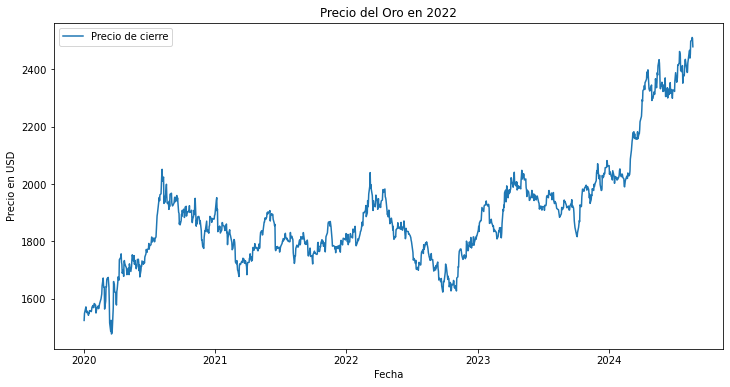

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gold_symbol = 'GC=F'  # Contrato de futuros del oro

# Rango de fechas
start_date = '2020-01-01'
end_date = '2024-08-23'

# Descarga de datos
gold_data = yf.download(gold_symbol, start=start_date, end=end_date)

#Primeros 5 registros
print(gold_data.head())

# Grafico
plt.figure(figsize=(12,6))
plt.plot(gold_data['Close'], label='Precio de cierre')
plt.title('Precio del Oro en 2022')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.show()



[*********************100%***********************]  1 of 1 completed


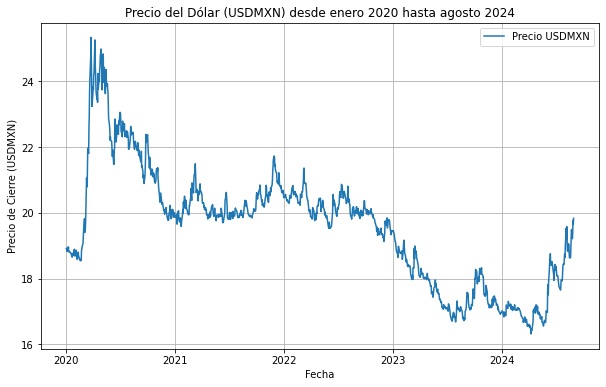

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('USDMXN=X', start='2020-01-01', end='2024-08-31')

plt.figure(figsize=(10,6))
plt.plot(data.index, data['Close'], label='Precio USDMXN')
plt.title('Precio del Dólar (USDMXN) desde enero 2020 hasta agosto 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USDMXN)')
plt.grid(True)
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Intercepto: 19.341704165152283
Coeficiente para la varianza del precio del oro: 0.0006454843601152561


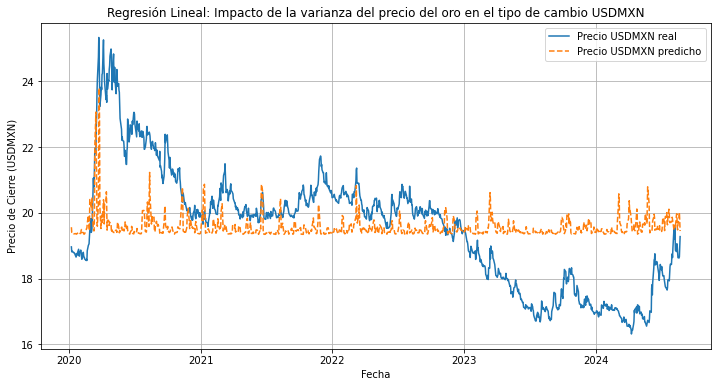

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Símbolos de los datos
gold_symbol = 'GC=F'  # Contrato de futuros del oro
usdmxn_symbol = 'USDMXN=X'  # Tipo de cambio del dólar al peso mexicano

# Rango de fechas
start_date = '2020-01-01'
end_date = '2024-08-23'

# Descarga de datos de oro
gold_data = yf.download(gold_symbol, start=start_date, end=end_date)

# Descarga de datos del tipo de cambio USDMXN
usdmxn_data = yf.download(usdmxn_symbol, start=start_date, end=end_date)

# Unir ambos datasets por la fecha
merged_data = pd.merge(gold_data['Close'], usdmxn_data['Close'], 
                       left_index=True, right_index=True, how='inner', 
                       suffixes=('_gold', '_usdmxn'))

# Renombrar columnas para facilitar el acceso
merged_data.columns = ['gold_price', 'usdmxn_price']

# Calcular la varianza del precio del oro (utilizaremos una ventana de 5 días para la varianza)
merged_data['gold_var'] = merged_data['gold_price'].rolling(window=5).var()

# Eliminar los valores nulos que resultan de la ventana de la varianza
merged_data.dropna(inplace=True)

# Definir las variables para la regresión
X = merged_data[['gold_var']]  # Variable independiente: varianza del precio del oro
y = merged_data['usdmxn_price']  # Variable dependiente: tipo de cambio USDMXN

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes del modelo
intercept = model.intercept_
coef_gold_var = model.coef_[0]

# Mostrar resultados
print(f"Intercepto: {intercept}")
print(f"Coeficiente para la varianza del precio del oro: {coef_gold_var}")

# Predicciones
predictions = model.predict(X)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, y, label='Precio USDMXN real')
plt.plot(merged_data.index, predictions, label='Precio USDMXN predicho', linestyle='--')
plt.title('Regresión Lineal: Impacto de la varianza del precio del oro en el tipo de cambio USDMXN')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USDMXN)')
plt.legend()
plt.grid(True)
plt.show()




25 de septiembre

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gold_symbol = 'GC=F'  # Contrato de futuros del oro

# Rango de fechas
start_date = '2020-01-01'
end_date = '2024-08-23'

# Descarga de datos
gold_data = yf.download(gold_symbol, start=start_date, end=end_date)

#Primeros 5 registros
print(gold_data.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
2020-01-03  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2020-01-06  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
2020-01-07  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
2020-01-08  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

            Volume  
Date                
2020-01-02     214  
2020-01-03     107  
2020-01-06     416  
2020-01-07      47  
2020-01-08     236  


In [7]:
from statsmodels.tsa.deterministic import Fourier

In [8]:
fourier_gen = Fourier(12, order=2)
fourier_data = fourier_gen.in_sample(data.index)

NameError: name 'data' is not defined

In [10]:
data = data.join (fourier_data)

NameError: name 'data' is not defined

In [11]:
data.columns

NameError: name 'data' is not defined

In [12]:
import numpy as np

# Extraer el índice de tiempo (fechas) de los datos
dates = gold_data.index

# Convertir las fechas en un número ordinal (necesario para la transformación)
t = np.arange(len(dates))

# Parámetros de Fourier: frecuencia estacional (por ejemplo, 12 meses para datos mensuales)
# Ajusta la frecuencia según la estacionalidad esperada en los datos
T = 365.25  # Si consideramos una estacionalidad anual

# Crear las componentes Fourier para los primeros 2 armónicos
fourier_terms = pd.DataFrame({
    'sin_1': np.sin(2 * np.pi * t / T),
    'cos_1': np.cos(2 * np.pi * t / T),
    'sin_2': np.sin(4 * np.pi * t / T),
    'cos_2': np.cos(4 * np.pi * t / T),
}, index=dates)

# Combinar las componentes de Fourier con los datos originales
gold_data_with_fourier = pd.concat([gold_data, fourier_terms], axis=1)



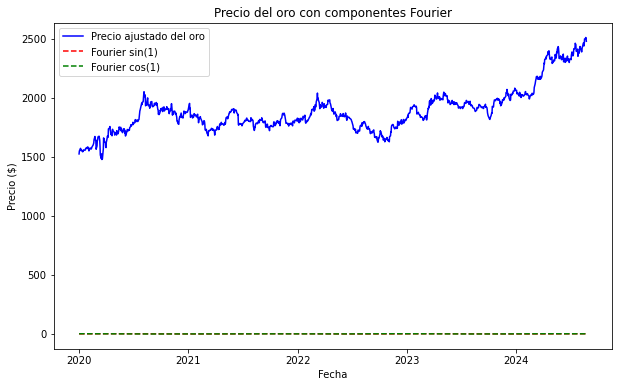

In [13]:
# Graficar las componentes de Fourier junto con los datos originales
plt.figure(figsize=(10, 6))
plt.plot(gold_data.index, gold_data['Adj Close'], label='Precio ajustado del oro', color='blue')
plt.plot(fourier_terms.index, fourier_terms['sin_1'], label='Fourier sin(1)', linestyle='--', color='red')
plt.plot(fourier_terms.index, fourier_terms['cos_1'], label='Fourier cos(1)', linestyle='--', color='green')
plt.title('Precio del oro con componentes Fourier')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Variables predictoras: las componentes de Fourier
X = fourier_terms

# Variable objetivo: el precio ajustado del oro
y = gold_data['Adj Close']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')



Error cuadrático medio: 31074.2173218905


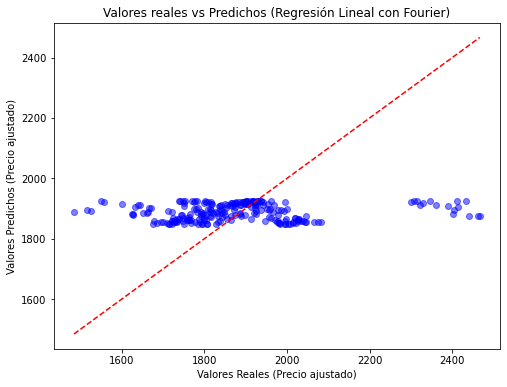

In [16]:
# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de igualdad
plt.title('Valores reales vs Predichos (Regresión Lineal con Fourier)')
plt.xlabel('Valores Reales (Precio ajustado)')
plt.ylabel('Valores Predichos (Precio ajustado)')
plt.show()


In [17]:
from sklearn.linear_model import Ridge

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generar componentes Fourier
dates = gold_data.index
t = np.arange(len(dates))
T = 365.25  # Frecuencia para estacionalidad anual

# Crear términos de Fourier
fourier_terms = pd.DataFrame({
    'sin_1': np.sin(2 * np.pi * t / T),
    'cos_1': np.cos(2 * np.pi * t / T),
    'sin_2': np.sin(4 * np.pi * t / T),
    'cos_2': np.cos(4 * np.pi * t / T),
}, index=dates)

# Crear el dataset final
X = fourier_terms
y = gold_data['Close']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Definir el modelo Ridge con regularización
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar alpha para más o menos regularización

# Entrenar el modelo
ridge_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = ridge_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 31073.460589419326


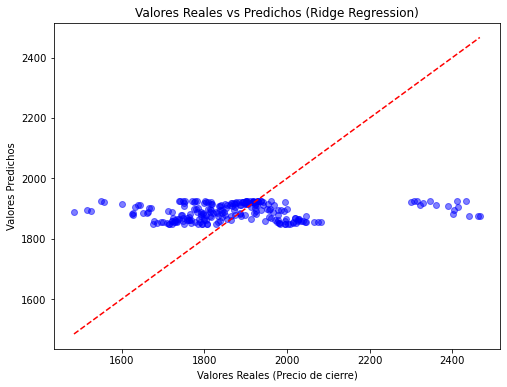

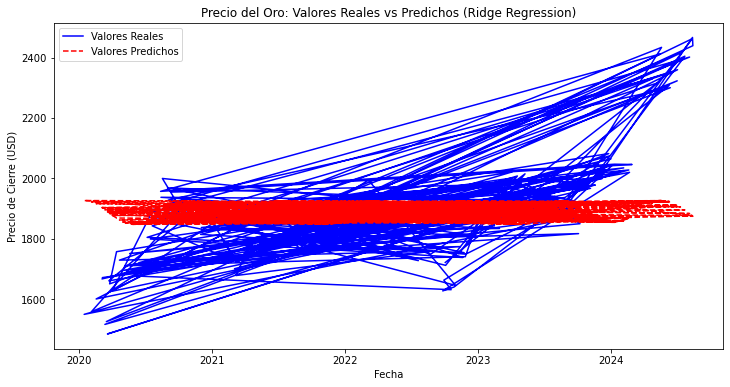

In [20]:
# Graficar resultados: precios reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de igualdad
plt.title('Valores Reales vs Predichos (Ridge Regression)')
plt.xlabel('Valores Reales (Precio de cierre)')
plt.ylabel('Valores Predichos')
plt.show()

# Graficar el precio real del oro y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Valores Reales', color='blue')
plt.plot(y_test.index, y_pred, label='Valores Predichos', color='red', linestyle='--')
plt.title('Precio del Oro: Valores Reales vs Predichos (Ridge Regression)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()
